In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Traffic_Accidents_Project')

Mounted at /content/drive/


**Time_of_day_India**

Text(0, 0.5, 'Total deaths')

<Figure size 2160x576 with 0 Axes>

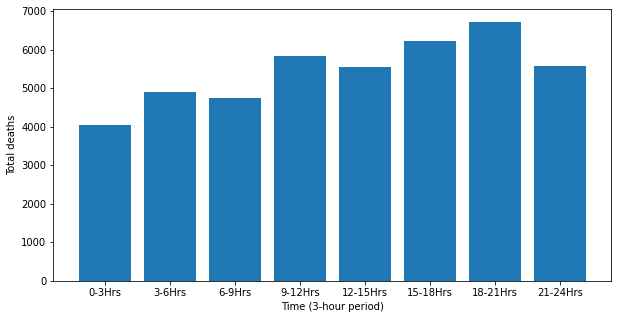

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('Traffic accidents by time of occurrence 2001-2014.csv')
X = data.iloc[18,:].values

accident_time = {1:X[3],2:X[4],3:X[5],4:X[6],5:X[7],6:X[8],7:X[9],8:X[10]}
times = list(accident_time.keys())
label = ['0-3Hrs','3-6Hrs','6-9Hrs','9-12Hrs','12-15Hrs','15-18Hrs','18-21Hrs','21-24Hrs']
#no_of_accidents1 = [X[3],X[4],X[5],X[6],X[7],X[8],X[9],X[10]]
#no_of_accidents = list(accident_time.values())
plt.figure(figsize=(30,8))
#plt.bar(times,no_of_accidents)


val=[]
for i in sorted(accident_time):
    val.append(accident_time[i])

plt.figure(figsize=(10,5))

plt.bar(list(accident_time.keys()),accident_time.values())
plt.xticks([1,2,3,4,5,6,7,8],label)
plt.xlabel('Time (3-hour period)')
plt.ylabel('Total deaths')

**Severity**

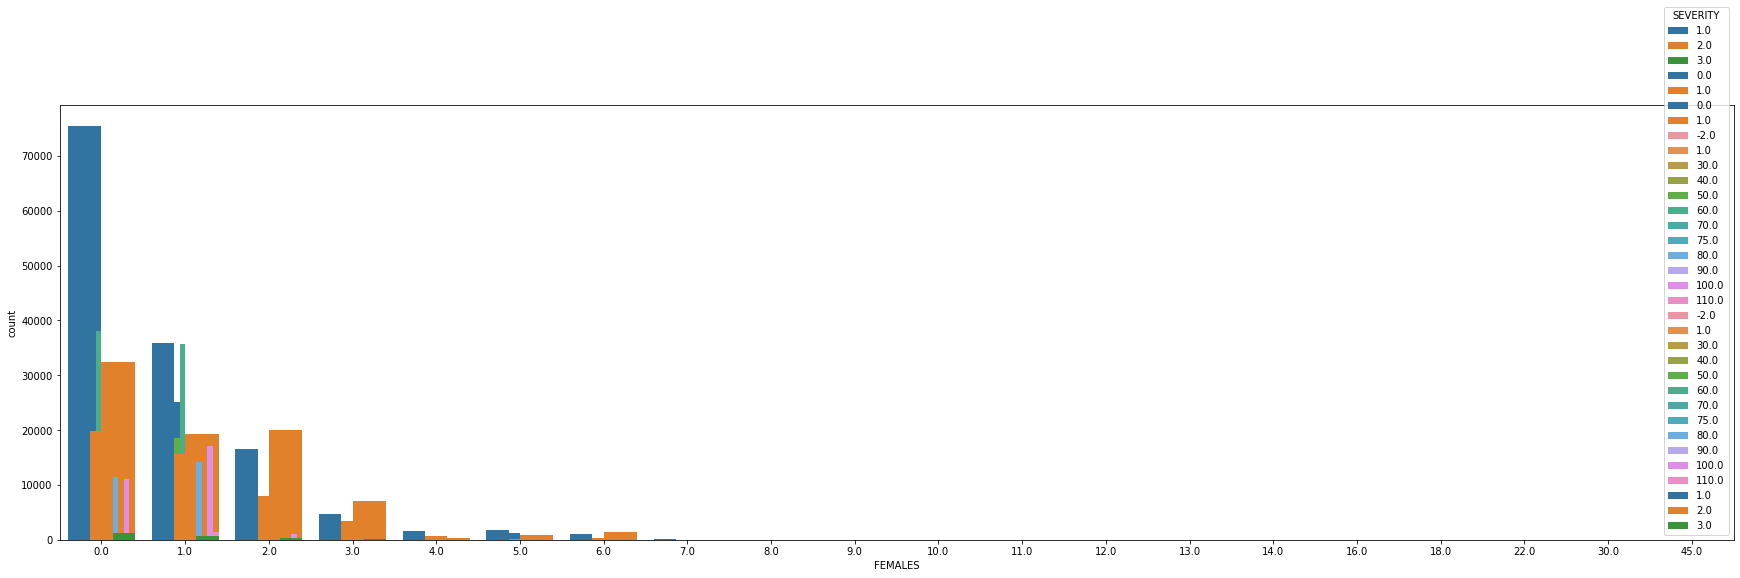

In [8]:
# Importing the dataset
dataset = pd.read_csv('Data_Final.csv')
X = dataset.iloc[:,:].values
X = np.delete(X,2,axis=1)
X = np.delete(X,1,axis=1)
X = np.delete(X,0,axis=1)
names = (dataset.columns.values)
names = names[3:]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(X[:,:])
X[:,:] =  imputer.transform(X[:,:])
data_new = pd.DataFrame(data=X,columns=names)

imputer = SimpleImputer(missing_values=-1,strategy="most_frequent")
imputer = imputer.fit(X[:,:])
X[:,:] =  imputer.transform(X[:,:])
data_new = pd.DataFrame(data=X,columns=names)



plt.figure(figsize=(30,8))

sns.countplot(x='LIGHT_CONDITION', hue='SEVERITY',data=data_new)
sns.countplot(x='SEVERITY',hue='ALCOHOLTIME',data=data_new)
sns.countplot(x='LIGHT_CONDITION',hue='ALCOHOLTIME',data=data_new)
sns.countplot(x='SEVERITY',hue='SPEED_ZONE',data=data_new)
sns.countplot(x='POLICE_ATTEND',hue='SPEED_ZONE',data=data_new)
sns.countplot(x='FEMALES',hue='SEVERITY',data=data_new)

**Fault_and_Type**

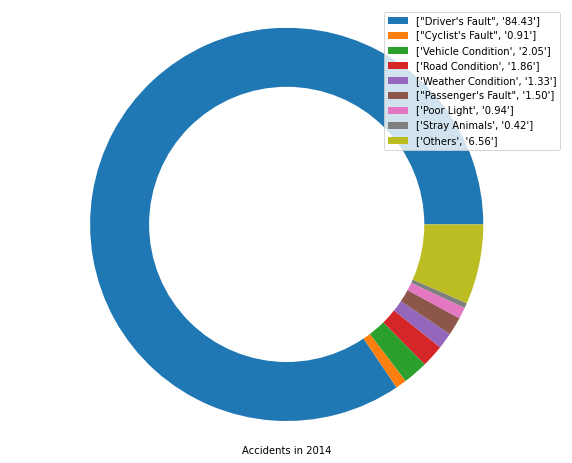

In [10]:
### Road-user data
FaultType = pd.read_csv('datafile_4.csv')
FaultType = FaultType.drop(FaultType.index[[34,37]])


faulttype = {}
faulttype["Driver's Fault"] = FaultType.loc[36,'Fault of Driver-Total No. of Road Accidents - 2014'] 
faulttype["Cyclist's Fault"] = FaultType.loc[36,'Fault of Cyclist-Total No. of Road Accidents - 2014'] 
faulttype["Vehicle Condition"] = FaultType.loc[36,'Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014'] 
faulttype["Road Condition"] = FaultType.loc[36,'Defect in Road Condition-Total No. of Road Accidents - 2014'] 
faulttype["Weather Condition"] = FaultType.loc[36,'Weather Condition-Total No. of Road Accidents - 2014'] 
faulttype["Passenger's Fault"] = FaultType.loc[36,'Fault of Passenger-Total No. of Road Accidents - 2014'] 
faulttype["Poor Light"] = FaultType.loc[36,'Poor light-Total No. of Road Accidents - 2014'] 
faulttype["Stray Animals"] = FaultType.loc[36,'Stray animals-Total No. of Road Accidents - 2014'] 
faulttype["Others"] = FaultType.loc[36,'Other causes/ Causes not known-Total No. of Road Accidents - 2014'] 


val = list(faulttype.values())
total = sum(val)
for i in range(0,9):
    val[i] = format(val[i]*100/total,'.2f')

plt.figure(figsize=(10,8))
plt.pie(list(faulttype.values()))
plt.axis('equal')
plt.xlabel('Accidents in 2014')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
label = [list(pair) for pair in zip(list(faulttype.keys()),val)]
plt.legend(label,loc="best")
plt.show()

# # Involvement of different types of vehicles
# RoadUserDf = pd.read_csv('datafile_3.csv') 
# if RoadUserDf.loc[['Telangana',12]] == "nan":
#     print(1)

# vehicletype = {}
# vehicletype["2-Wheeler"] = RoadUserDf.loc[36,'Motor Cycle/ Scooter - Number of Road Accidents - Total - 2016']
# vehicletype["2-Wheeler"] += RoadUserDf.loc[36,'Moped/Scootty - Number of Road Accidents - Total - 2016']

# vehicletype["3-Wheeler"] = RoadUserDf.loc[36,'Auto rickshaw - Number of Road Accidents - Total - 2016']
# vehicletype["3-Wheeler"] += RoadUserDf.loc[36,'Tempo - Number of Road Accidents - Total - 2016']
# vehicletype["3-Wheeler"] += RoadUserDf.loc[36,'E-Rickshaw - Number of Road Accidents - Total - 2016']


# vehicletype["4-Wheeler"] = RoadUserDf.loc[36,'Motor Car - Number of Road Accidents - Total - 2016']
# vehicletype["4-Wheeler"] += RoadUserDf.loc[36,'Jeep - Number of Road Accidents - Total - 2016']
# vehicletype["4-Wheeler"] += RoadUserDf.loc[36,'Taxi - Number of Road Accidents - Total - 2016']

# vehicletype["Heavy Vehicle"] = RoadUserDf.loc[36,'Bus - Number of Road Accidents - Total - 2016']
# vehicletype["Heavy Vehicle"] += RoadUserDf.loc[36,'Truck/Lorry - Number of Road Accidents - Total - 2016']
# vehicletype["Heavy Vehicle"] += RoadUserDf.loc[36,'Articulated Vehicle/Trolly - Number of Road Accidents - Fatal - 2016']
# vehicletype["Heavy Vehicle"] += RoadUserDf.loc[36,'Tractor - Number of Road Accidents - Total - 2016']

# vehicletype["Other Vehicle"] = RoadUserDf.loc[36,'Other Motor Vehicles - Number of Road Accidents - Total - 2016']

# #plot vehicle-type

# plt.figure(figsize=(10,8))
# plt.pie(list(vehicletype.values()),labels=list(vehicletype.keys()),autopct='%1.2f%%')
# plt.axis('equal')
# plt.xlabel('Types of Vehicles Involved in Accidents in 2016')

# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# plt.show()